# CDA Homework 5

---

# Question 2: AdaBoost

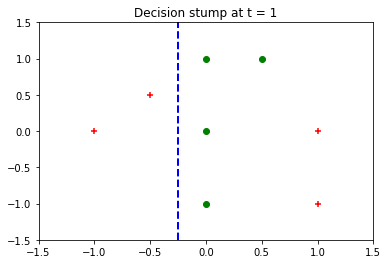

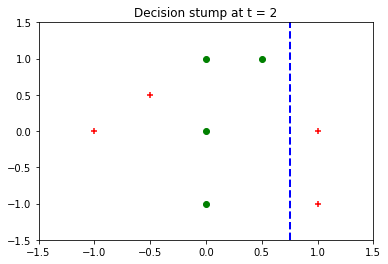

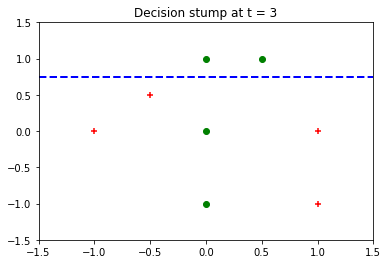

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data points
X = np.array([[-1, 0], [-0.5, 0.5], [0, 1], [0.5, 1], [1, 0], [1, -1], [0, -1], [0, 0]])
y = np.array([1, 1, -1, -1, 1, 1, -1, -1])

def plot_decision_stump(t, X, y, feature, threshold):
    plt.figure()

    for i in range(len(X)):
        if y[i] == 1:
            plt.scatter(X[i, 0], X[i, 1], color='red', marker='+')
        else:
            plt.scatter(X[i, 0], X[i, 1], color='green', marker='o')

    if feature == 0:  # Vertical line
        plt.axvline(x=threshold, color='blue', linestyle='--', linewidth=2)
    elif feature == 1:  # Horizontal line
        plt.axhline(y=threshold, color='blue', linestyle='--', linewidth=2)

    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.title(f'Decision stump at t = {t}')
    plt.show()

# Plot for t=1
plot_decision_stump(1, X, y, feature=0, threshold=-0.25)

# Plot for t=2
plot_decision_stump(2, X, y, feature=0, threshold=0.75)

# Plot for t=3
plot_decision_stump(3, X, y, feature=1, threshold=0.75)


---

# Question 3: Random forest and one-class SVM for email spam classifier

## Part (A) CART

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

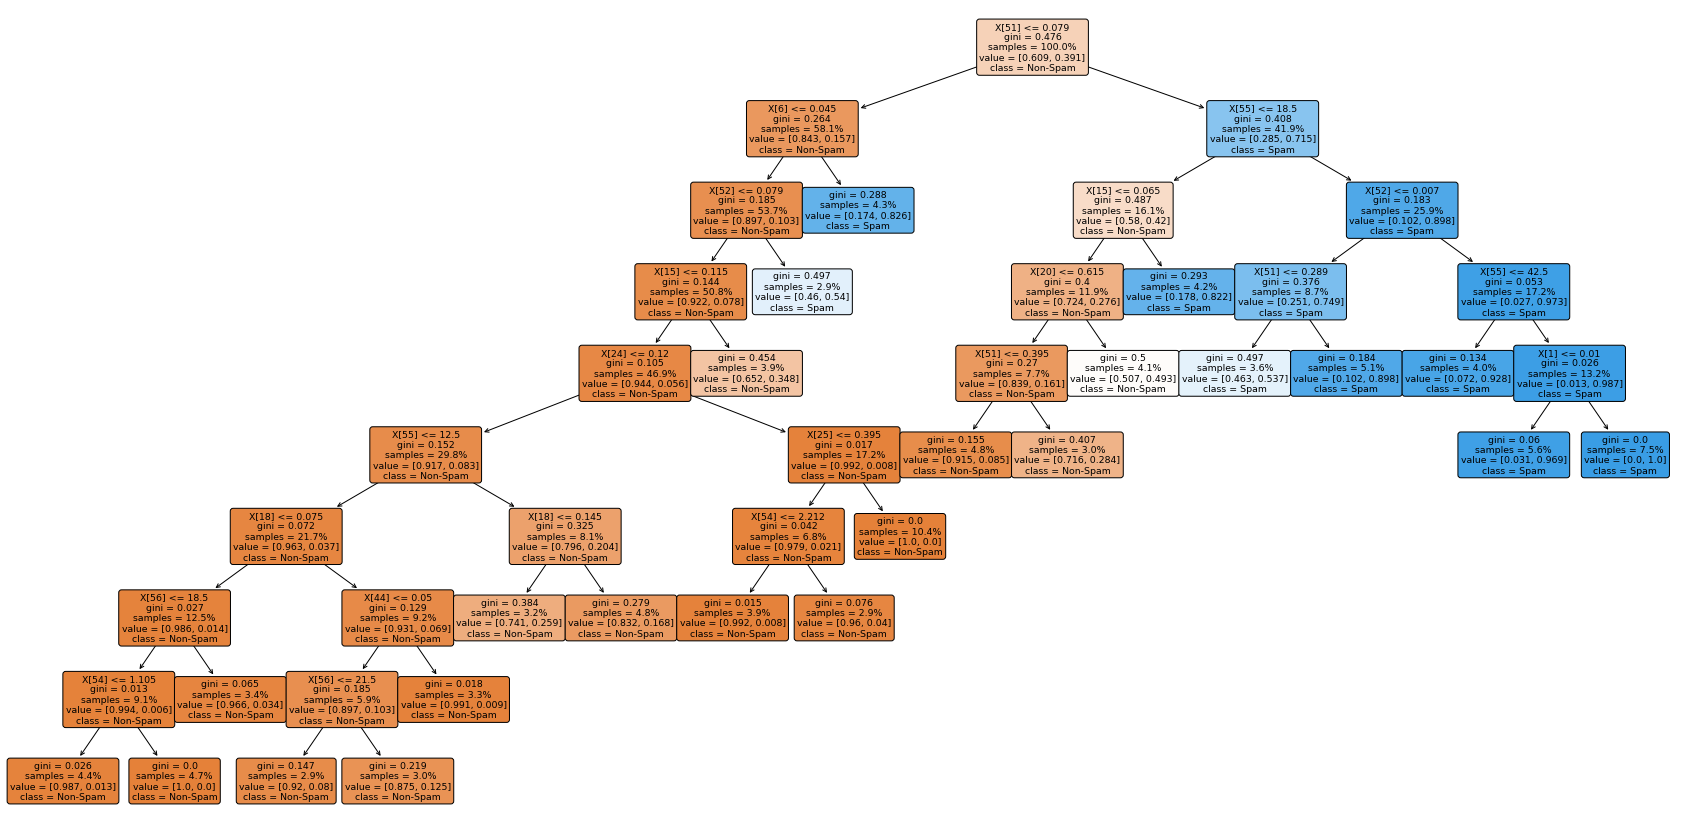

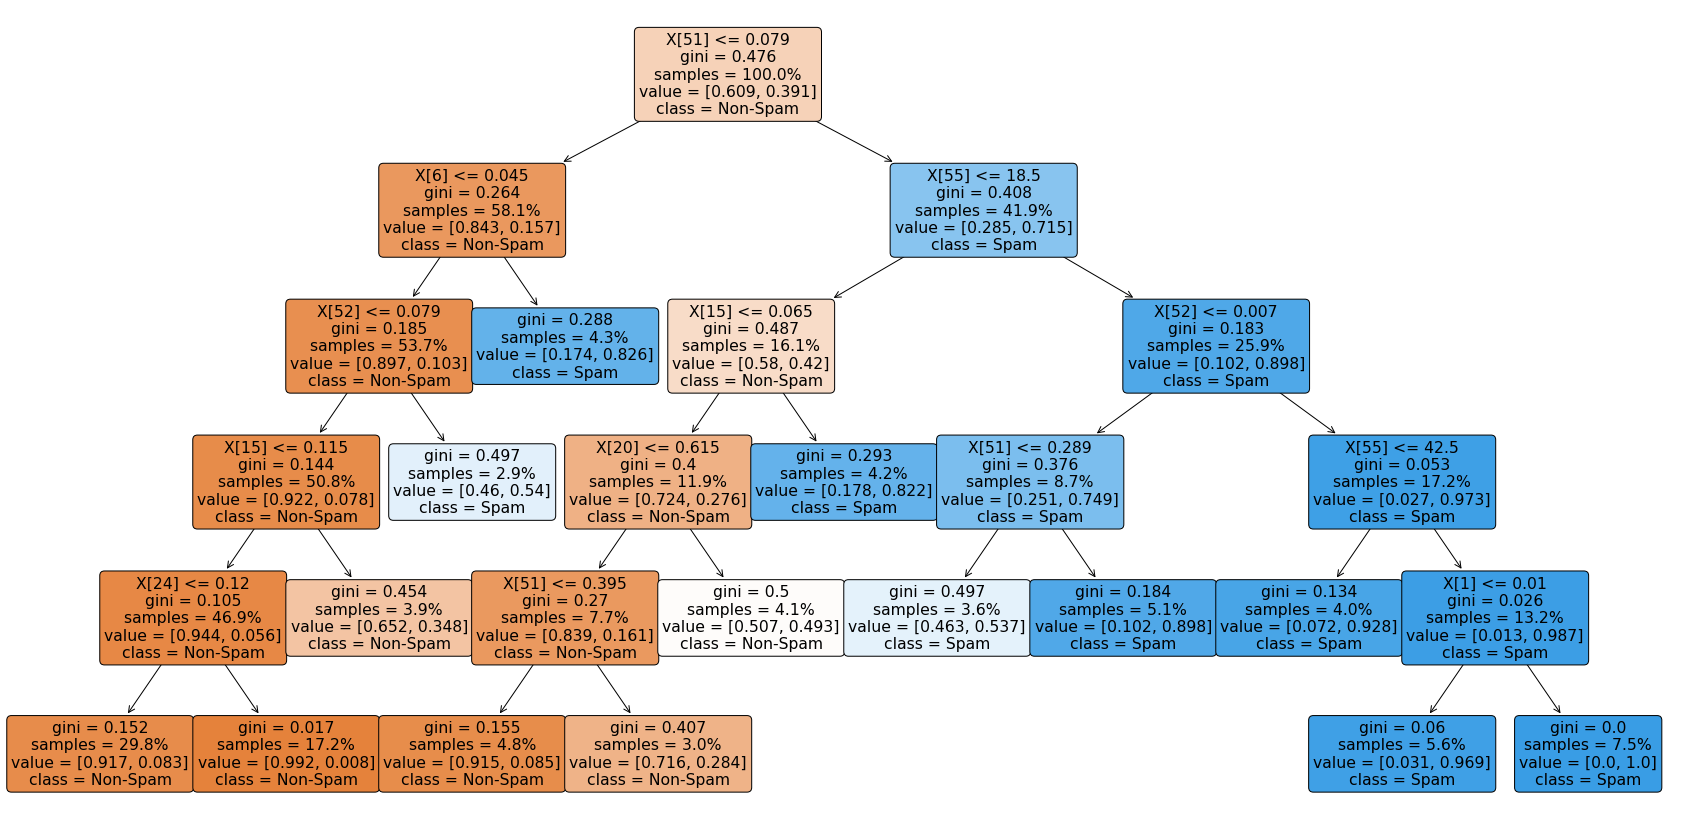

In [4]:
# Import the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load the dataset from the specified file
spam_data = pd.read_csv('spambase/spambase.data', sep=",", header=None)

# Separate the dataset into features (X) and target labels (y)
features = spam_data.iloc[:, 0:57]
labels = spam_data.iloc[:, 57:58]

# Split the dataset into training and testing sets, with 25% of data for testing
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.25, shuffle=True, random_state=123)

# Initialize the Decision Tree Classifier with a minimum of 100 samples per leaf
tree_model = DecisionTreeClassifier(min_samples_leaf=100)

# Fit the model using the training data
tree_model = tree_model.fit(features_train, labels_train.values.ravel())

# Create a plot to visualize the full decision tree with color coding and Gini impurity values
figure, axis = plt.subplots(figsize=(30, 15))
plot_tree(tree_model,
          filled=True,
          feature_names=None,
          class_names=['Non-Spam', 'Spam'],
          ax=axis,
          impurity=True,  # Include Gini impurity values
          proportion=True,
          rounded=True)

# Save the plot as an image file
plt.savefig('CART_full.jpg')
plt.show()

# Create and fit a new Decision Tree Classifier with max_depth of 5
tree_model_pruned = DecisionTreeClassifier(min_samples_leaf=100, max_depth=5)
tree_model_pruned = tree_model_pruned.fit(features_train, labels_train.values.ravel())

# Create a plot to visualize the pruned decision tree with color coding and Gini impurity values
figure, axis = plt.subplots(figsize=(30, 15))
plot_tree(tree_model_pruned,
          filled=True,
          feature_names=None,
          class_names=['Non-Spam', 'Spam'],
          ax=axis,
          impurity=True,  # Include Gini impurity values
          proportion=True,
          rounded=True)

# Save the plot as an image file
plt.savefig('CART_pruned_5_layers.jpg')
plt.show()


-----

## Part (B) Random Forest

In [5]:
# Import the RandomForestClassifier from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier with minimum samples per leaf and a random state for reproducibility
random_forest_model = RandomForestClassifier(min_samples_leaf=100, random_state=0)

# Fit the Random Forest model on the training data
random_forest_model.fit(features_train, labels_train.values.ravel())

# Predict the labels for the training data using the Random Forest model
predicted_train_rf = random_forest_model.predict(features_train)

# Predict the labels for the testing data using the Random Forest model
predicted_test_rf = random_forest_model.predict(features_test)

# Import accuracy_score from sklearn.metrics to calculate the test error
from sklearn.metrics import accuracy_score

# Predict the labels for the test data using the Decision Tree model
predicted_test_tree = tree_model.predict(features_test)

# Calculate the test error for the CART model
cart_test_error = 1 - accuracy_score(labels_test, predicted_test_tree)

# Calculate the test error for the Random Forest model
rf_test_error = 1 - accuracy_score(labels_test, predicted_test_rf)

# Display the test errors for both models
cart_test_error, rf_test_error


(0.1251086012163336, 0.08948740225890528)

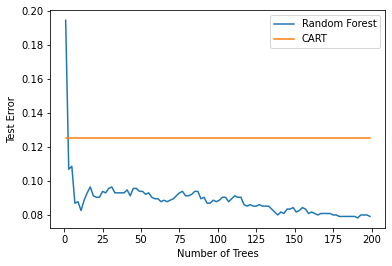

In [7]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize parameters for the range of number of trees
min_trees = 1
max_trees = 200

# Lists to store the number of trees and the corresponding test errors
num_trees = []
random_forest_errors = []

# Loop through different numbers of trees
for num in np.arange(min_trees, max_trees + 1, 2):
    # Initialize the Random Forest Classifier with a varying number of trees
    random_forest_temp = RandomForestClassifier(min_samples_leaf=100, random_state=0, n_estimators=num)

    # Fit the Random Forest model on the training data
    random_forest_temp.fit(features_train, labels_train.values.ravel())

    # Predict the labels for the testing data using the temporary Random Forest model
    predicted_test_rf_temp = random_forest_temp.predict(features_test)

    # Calculate the test error for the temporary Random Forest model
    rf_temp_error = 1 - accuracy_score(labels_test, predicted_test_rf_temp)

    # Append the current number of trees and the corresponding test error to the lists
    num_trees.append(num)
    random_forest_errors.append(rf_temp_error)

# Create a constant array for the CART model error across all tree numbers
cart_errors = np.ones(len(num_trees)) * cart_test_error

# Plot the test error versus the number of trees for the Random Forest model
plt.plot(num_trees, random_forest_errors)
plt.plot(num_trees, cart_errors)
plt.legend(['Random Forest', 'CART'], loc='upper right')
plt.ylabel('Test Error')
plt.xlabel('Number of Trees')
plt.savefig('Test_Error_Rate.jpg')


---

## Part (C)

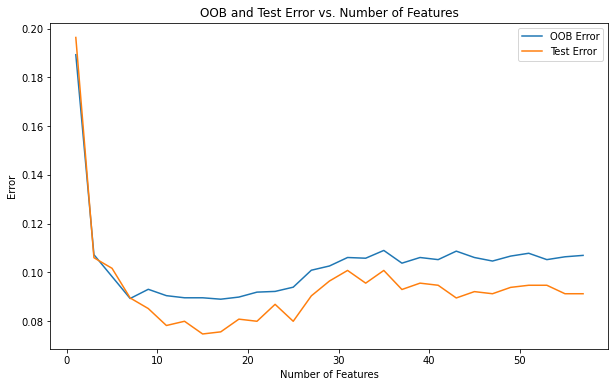

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset from the specified file
spam_data = pd.read_csv('spambase/spambase.data', sep=",", header=None)

# Separate the dataset into features (X) and target labels (y)
features = spam_data.iloc[:, 0:57]
labels = spam_data.iloc[:, 57:58]

# Split the dataset into training and testing sets, with 25% of data for testing
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.25, shuffle=True, random_state=123)

# Define the range of values for the number of features to consider at each split
num_features_range = np.arange(1, features.shape[1] + 1, 2)

# Lists to store the OOB error and test error for each value of num_features
oob_errors = []
test_errors = []

# Loop through different values of num_features
for num_features in num_features_range:
    # Initialize the Random Forest Classifier with the current num_features
    rf_model = RandomForestClassifier(min_samples_leaf=100, random_state=0, n_estimators=100, max_features=num_features, oob_score=True)

    # Fit the model on the training data
    rf_model.fit(features_train, labels_train.values.ravel())

    # Calculate the OOB error
    oob_error = 1 - rf_model.oob_score_
    oob_errors.append(oob_error)

    # Predict the labels for the testing data
    predicted_test_rf = rf_model.predict(features_test)

    # Calculate the test error
    test_error = 1 - accuracy_score(labels_test, predicted_test_rf)
    test_errors.append(test_error)

# Plot the OOB error and test error against the number of features
plt.figure(figsize=(10, 6))
plt.plot(num_features_range, oob_errors, label='OOB Error')
plt.plot(num_features_range, test_errors, label='Test Error')
plt.xlabel('Number of Features')
plt.ylabel('Error')
plt.legend()
plt.title('OOB and Test Error vs. Number of Features')
plt.savefig('OOB_Test_Error_vs_Num_Features.jpg')
plt.show()


---

## Part (D)

In [9]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score
import numpy as np

# Load the dataset from the specified file
spam_data = pd.read_csv('spambase/spambase.data', sep=",", header=None)

# Separate the dataset into features (X) and target labels (y)
features = spam_data.iloc[:, 0:57]
labels = spam_data.iloc[:, 57]

# Split the dataset into training (75%) and testing (25%) sets
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.25, shuffle=True, random_state=123)

# Extract non-spam emails (label 0) from the training data
non_spam_train = features_train[labels_train == 0]

# Define the parameter grid for tuning
param_grid = {
    'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10],
    'nu': [0.1, 0.2, 0.5, 0.7, 0.9]
}

# Initialize the One-Class SVM model
oc_svm = OneClassSVM(kernel='rbf')

# Perform grid search to find the best parameters
grid_search = GridSearchCV(oc_svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(non_spam_train, np.zeros(non_spam_train.shape[0]))

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict the labels for the testing data
predictions_test = best_model.predict(features_test)

# Convert predictions: 1 for inliers (non-spam) and -1 for outliers (spam)
# True labels: 1 for non-spam and 0 for spam
predictions_test = [0 if x == -1 else 1 for x in predictions_test]

# Calculate the misclassification error rate
misclassification_error = 1 - accuracy_score(labels_test, predictions_test)

# Display the best parameters and misclassification error rate
best_params, misclassification_error


({'gamma': 'scale', 'nu': 0.1}, 0.6403127715030408)

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score

# Load the dataset from the specified file
spam_data = pd.read_csv('spambase/spambase.data', sep=",", header=None)

# Separate the dataset into features (X) and target labels (y)
features = spam_data.iloc[:, 0:57]
labels = spam_data.iloc[:, 57]

# Split the dataset into training (75%) and testing (25%) sets
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.25, shuffle=True, random_state=123)

# Extract non-spam emails (label 0) from the training data
non_spam_train = features_train[labels_train == 0]

# Train a one-class SVM using RBF kernel with an initial gamma value
initial_gamma = 0.03
clf = OneClassSVM(kernel='rbf', gamma=initial_gamma).fit(non_spam_train)
y_test_pred = clf.predict(features_test)

# Convert predictions: 1 for inliers (non-spam) and -1 for outliers (spam)
# True labels: 1 for non-spam and 0 for spam
y_test_pred[y_test_pred == 1] = 0
y_test_pred[y_test_pred == -1] = 1

# Calculate the initial misclassification error rate
one_class_svm_test_error = sum(y_test_pred != labels_test) / len(labels_test)
print('The test error of One-class SVM: ', one_class_svm_test_error)

# Find M (Median distance)
m = features_train.shape[0]
P = np.array(features_train) @ np.array(features_train).T
pairwise_distances = []
for i in range(m):
    for j in range(i+1, m):
        pairwise_distances.append(P[i, i] - 2 * P[i, j] + P[j, j])
M = np.median(np.array(pairwise_distances))

# Function to calculate the test error for different gamma values
def ocsvm(X, gamma):
    clf = OneClassSVM(kernel='rbf', gamma=gamma).fit(X)
    y_test_pred = clf.predict(features_test)
    # Inliers are non-spam emails
    y_test_pred[y_test_pred == 1] = 0
    # Outliers are spam emails
    y_test_pred[y_test_pred == -1] = 1
    one_class_svm_test_error = sum(y_test_pred != labels_test) / len(labels_test)
    return one_class_svm_test_error

# Find the optimal gamma value
gammas = np.arange(0.01, 0.5, 0.01)
opt_gamma = 0.1
opt_error = 0.4
for gamma in gammas:
    error = ocsvm(non_spam_train, gamma)
    if error < opt_error:
        opt_error = error
        opt_gamma = gamma
print('The optimal gamma is', opt_gamma)
print('The optimal error is', opt_error)


The test error of One-class SVM:  0.3579496090356212
The optimal gamma is 0.01
The optimal error is 0.34578627280625546


---

# Question 4 Locally weighted linear regression and bias-variance tradeoff.

## Part (B)

In [11]:
import scipy.io

# Load the .mat file
data = scipy.io.loadmat('data.mat')

# Display the keys in the data dictionary
print(data.keys())


dict_keys(['__header__', '__version__', '__globals__', 'data'])


In [12]:
print(data['data'])


[[-4.00000000e+00  5.37667140e-02]
 [-3.96000000e+00  1.71518293e-01]
 [-3.92000000e+00 -2.48052750e-01]
 [-3.88000000e+00  5.53129160e-02]
 [-3.84000000e+00 -6.21358801e-03]
 [-3.80000000e+00 -1.74504830e-01]
 [-3.76000000e+00 -9.12121302e-02]
 [-3.72000000e+00 -1.61892973e-02]
 [-3.68000000e+00  3.06296398e-01]
 [-3.64000000e+00  2.25805271e-01]
 [-3.60000000e+00 -1.84236694e-01]
 [-3.56000000e+00  2.57609499e-01]
 [-3.52000000e+00  3.14865985e-02]
 [-3.48000000e+00 -4.10772633e-02]
 [-3.44000000e+00  4.44267384e-02]
 [-3.40000000e+00 -3.83886058e-02]
 [-3.36000000e+00 -1.97304028e-02]
 [-3.32000000e+00  1.53639457e-01]
 [-3.28000000e+00  1.58957593e-01]
 [-3.24000000e+00  1.74545769e-01]
 [-3.20000000e+00  1.16125713e-01]
 [-3.16000000e+00 -5.42569803e-02]
 [-3.12000000e+00  1.57086681e-01]
 [-3.08000000e+00  2.68601993e-01]
 [-3.04000000e+00  1.76017185e-01]
 [-3.00000000e+00  2.53469301e-01]
 [-2.96000000e+00  2.46872705e-01]
 [-2.92000000e+00  1.69325444e-01]
 [-2.88000000e+00  2

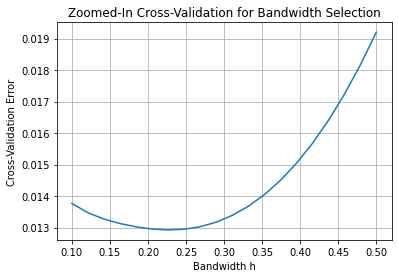

Best bandwidth: 0.2


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import KFold

# Load data from the .mat file
data = loadmat('data.mat')
data_array = data['data']

# Extract x and y from the data array
x = data_array[:, 0]
y = data_array[:, 1]

# Define the Gaussian kernel function
def gaussian_kernel(z, h):
    return np.exp(-np.linalg.norm(z)**2 / (2 * h**2))

# Implement locally weighted linear regression
def locally_weighted_linear_regression(x_train, y_train, x_query, h):
    m = len(x_train)
    W = np.diag([gaussian_kernel(x_query - x_train[i], h) for i in range(m)])
    X = np.vstack((np.ones(m), x_train)).T
    theta = np.linalg.inv(X.T @ W @ X) @ (X.T @ W @ y_train)
    return theta

def predict(x_train, y_train, x_query, h):
    theta = locally_weighted_linear_regression(x_train, y_train, x_query, h)
    return np.array([1, x_query]) @ theta

# Perform 5-fold cross-validation to tune the bandwidth parameter h
def cross_validation(x, y, bandwidths, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    errors = np.zeros(len(bandwidths))

    for i, h in enumerate(bandwidths):
        fold_errors = []
        for train_index, test_index in kf.split(x):
            x_train, x_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            predictions = np.array([predict(x_train, y_train, x_test[j], h) for j in range(len(x_test))])
            fold_errors.append(np.mean((y_test - predictions)**2))
        errors[i] = np.mean(fold_errors)

    return errors

# Define bandwidths to test
bandwidths = np.linspace(0.1, 2, 20)
errors = cross_validation(x, y, bandwidths)

# Plot cross-validation errors
# Define a narrower range of bandwidths to test
zoomed_bandwidths = np.linspace(0.1, 0.5, 20)
zoomed_errors = cross_validation(x, y, zoomed_bandwidths)

# Plot cross-validation errors for the zoomed-in range
plt.plot(zoomed_bandwidths, zoomed_errors)
plt.xlabel('Bandwidth h')
plt.ylabel('Cross-Validation Error')
plt.title('Zoomed-In Cross-Validation for Bandwidth Selection')
plt.grid(True)
plt.show()


# Best bandwidth
best_h = bandwidths[np.argmin(errors)]
print(f'Best bandwidth: {best_h}')


In [14]:
# Identify the best bandwidth from the zoomed-in range
best_zoomed_h = zoomed_bandwidths[np.argmin(zoomed_errors)]
print(f'Best bandwidth from zoomed-in range: {best_zoomed_h}')

Best bandwidth from zoomed-in range: 0.22631578947368422


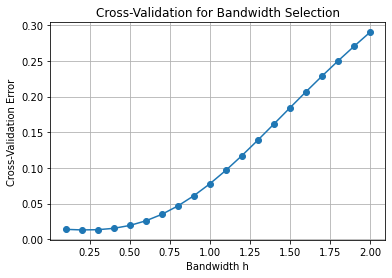

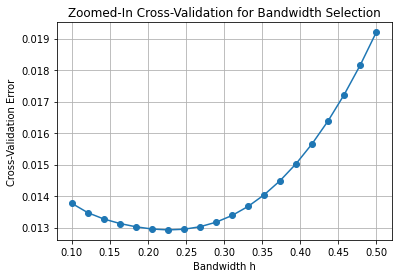

Best bandwidth (zoomed-in): 0.22631578947368422


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import KFold

# Load data from the .mat file
data = loadmat('data.mat')
data_array = data['data']

# Extract x and y from the data array
x = data_array[:, 0]
y = data_array[:, 1]

# Define the Gaussian kernel function
def gaussian_kernel(z, h):
    return np.exp(-np.linalg.norm(z)**2 / (2 * h**2))

# Implement locally weighted linear regression
def locally_weighted_linear_regression(x_train, y_train, x_query, h):
    m = len(x_train)
    W = np.diag([gaussian_kernel(x_query - x_train[i], h) for i in range(m)])
    X = np.vstack((np.ones(m), x_train)).T
    theta = np.linalg.inv(X.T @ W @ X) @ (X.T @ W @ y_train)
    return theta

def predict(x_train, y_train, x_query, h):
    theta = locally_weighted_linear_regression(x_train, y_train, x_query, h)
    return np.array([1, x_query]) @ theta

# Perform 5-fold cross-validation to tune the bandwidth parameter h
def cross_validation(x, y, bandwidths, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    errors = np.zeros(len(bandwidths))

    for i, h in enumerate(bandwidths):
        fold_errors = []
        for train_index, test_index in kf.split(x):
            x_train, x_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            predictions = np.array([predict(x_train, y_train, x_test[j], h) for j in range(len(x_test))])
            fold_errors.append(np.mean((y_test - predictions)**2))
        errors[i] = np.mean(fold_errors)

    return errors

# Define a broad range of bandwidths to test
bandwidths = np.linspace(0.1, 2, 20)
errors = cross_validation(x, y, bandwidths)

# Plot cross-validation errors for the broad range
plt.plot(bandwidths, errors, marker='o')
plt.xlabel('Bandwidth h')
plt.ylabel('Cross-Validation Error')
plt.title('Cross-Validation for Bandwidth Selection')
plt.grid(True)
plt.show()

# Zoom in to a narrower range of bandwidths to test
zoomed_bandwidths = np.linspace(0.1, 0.5, 20)
zoomed_errors = cross_validation(x, y, zoomed_bandwidths)

# Plot cross-validation errors for the zoomed-in range
plt.plot(zoomed_bandwidths, zoomed_errors, marker='o')
plt.xlabel('Bandwidth h')
plt.ylabel('Cross-Validation Error')
plt.title('Zoomed-In Cross-Validation for Bandwidth Selection')
plt.grid(True)
plt.show()

# Best bandwidth from the zoomed-in range
best_h_zoomed = zoomed_bandwidths[np.argmin(zoomed_errors)]
print(f'Best bandwidth (zoomed-in): {best_h_zoomed}')


I coded it twice to double check.

---

## Part (C)

Predicted y value for x = -1.5: 1.8088595105728853


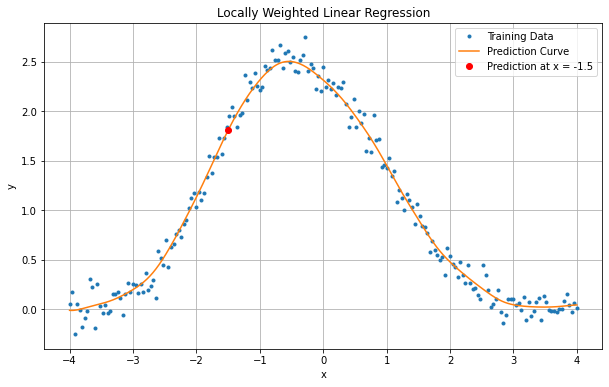

In [16]:
# Define the optimal bandwidth
optimal_h = best_zoomed_h

# Make a prediction for x = -1.5
x_query = -1.5
predicted_y = predict(x, y, x_query, optimal_h)
print(f'Predicted y value for x = {x_query}: {predicted_y}')

# Generate predictions for the entire range of x for plotting
x_range = np.linspace(min(x), max(x), 500)
y_predictions = np.array([predict(x, y, x_val, optimal_h) for x_val in x_range])

# Plot the noisy curve, training data, prediction curve, and mark the prediction point
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Training Data', markersize=3)
plt.plot(x_range, y_predictions, label='Prediction Curve')
plt.plot(x_query, predicted_y, 'ro', label=f'Prediction at x = {x_query}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Locally Weighted Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


Predicted y value for x = -1.5: 1.8088595105728853


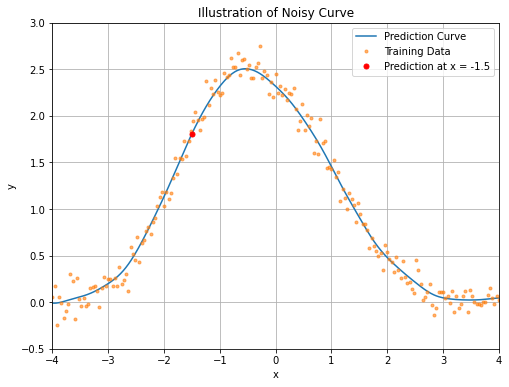

In [17]:
# Define the optimal bandwidth
optimal_h = best_zoomed_h

# Make a prediction for x = -1.5
x_query = -1.5
predicted_y = predict(x, y, x_query, optimal_h)
print(f'Predicted y value for x = {x_query}: {predicted_y}')

# Generate predictions for the entire range of x for plotting
x_range = np.linspace(min(x), max(x), 500)
y_predictions = np.array([predict(x, y, x_val, optimal_h) for x_val in x_range])

# Plot the noisy curve, training data, prediction curve, and mark the prediction point
plt.figure(figsize=(8, 6))
plt.plot(x_range, y_predictions, label='Prediction Curve')
plt.plot(x, y, 'o', markersize=3, alpha=0.6, label='Training Data')
plt.plot(x_query, predicted_y, 'ro', markersize=5, label=f'Prediction at x = {x_query}')

# Adjusting plot style to match the provided example
plt.xlim([-4, 4])
plt.ylim([-0.5, 3])
plt.xticks(np.arange(-4, 5, 1))
plt.yticks(np.arange(-0.5, 3.5, 0.5))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Illustration of Noisy Curve')
plt.grid(True)
plt.legend()
plt.show()


Again I plotted twice to be safe.

---